### Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'/Users/nataliawijaya/Documents/Bootcamp/New York Citi Bikes/02 Data'

In [4]:
df = pd.read_csv(os.path.join(path, 'Prepared Data', 'citibike_cleaned_exc2930_1.csv'), index_col = False)

In [5]:
df

,Unnamed: 0,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,...,start_day,end_year,end_month,end_week,end_day,end_hour,days_category,peak_hours,avg_trip_duration_each_hour,day_of_week
0,0,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,...,9,2013,9,37,9,18,Weekdays,Peak hours,14.1,2
1,1,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,...,12,2013,9,37,12,18,Weekdays,Peak hours,14.1,5
2,2,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,...,18,2013,9,38,18,19,Weekdays,Peak hours,13.2,4
3,3,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,...,28,2013,9,39,28,12,Weekend,Normal hours,14.0,7
4,4,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,...,7,2013,9,36,7,18,Weekend,Peak hours,14.1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46668,46668,17988,Sat,18,2013-09-21 18:39:20,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-21 20:08:59,...,21,2013,9,38,21,20,Weekend,Peak hours,14.1,7
46669,46669,18458,Sat,17,2013-09-14 17:32:26,261,Johnson St & Gold St,40.694749,-73.983625,2013-09-14 17:52:17,...,14,2013,9,37,14,17,Weekend,Peak hours,14.0,7
46670,46670,15054,Sat,18,2013-09-07 18:08:21,402,Broadway & E 22 St,40.740343,-73.989551,2013-09-07 18:25:51,...,7,2013,9,36,7,18,Weekend,Peak hours,14.1,7
46671,46671,16763,Sat,13,2013-09-07 13:25:35,271,Ashland Pl & Hanson Pl,40.685282,-73.978058,2013-09-07 14:14:04,...,7,2013,9,36,7,14,Weekend,Normal hours,13.7,7


In [6]:
df = df.drop(columns = ['Unnamed: 0'])

In [7]:
df.head()

,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,...,start_day,end_year,end_month,end_week,end_day,end_hour,days_category,peak_hours,avg_trip_duration_each_hour,day_of_week
0,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,...,9,2013,9,37,9,18,Weekdays,Peak hours,14.1,2
1,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,...,12,2013,9,37,12,18,Weekdays,Peak hours,14.1,5
2,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,...,18,2013,9,38,18,19,Weekdays,Peak hours,13.2,4
3,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,...,28,2013,9,39,28,12,Weekend,Normal hours,14.0,7
4,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,476,...,7,2013,9,36,7,18,Weekend,Peak hours,14.1,7


In [8]:
df.shape

(46673, 32)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46673 entries, 0 to 46672
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   bike_id                      46673 non-null  int64  
 1   weekday                      46673 non-null  object 
 2   start_hour                   46673 non-null  int64  
 3   start_time                   46673 non-null  object 
 4   start_station_id             46673 non-null  int64  
 5   start_station_name           46673 non-null  object 
 6   start_station_latitude       46673 non-null  float64
 7   start_station_longitude      46673 non-null  float64
 8   end_time                     46673 non-null  object 
 9   end_station_id               46673 non-null  int64  
 10  end_station_name             46673 non-null  object 
 11  end_station_latitude         46673 non-null  float64
 12  end_station_longitude        46673 non-null  float64
 13  trip_duration   

In [10]:
df.describe()

,bike_id,start_hour,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,trip_duration,birth_year,...,start_month,start_week,start_day,end_year,end_month,end_week,end_day,end_hour,avg_trip_duration_each_hour,day_of_week
count,46673.000000,46673.000000,46673.000000,46673.000000,46673.000000,46673.000000,46673.000000,46673.000000,46673.000000,40191.000000,...,46673.0,46673.000000,46673.000000,46673.0,46673.0,46673.000000,46673.000000,46673.000000,46673.000000,46673.000000
mean,17611.710454,14.152722,442.692049,40.734262,-73.991118,442.403252,40.733940,-73.991364,838.269449,1975.608470,...,9.0,37.436719,15.029010,2013.0,9.0,37.437041,15.032867,14.313757,13.466152,4.100893
std,1674.680560,4.868148,355.257605,0.019883,0.012549,355.227714,0.019858,0.012552,572.795827,11.085518,...,0.0,1.152806,7.931816,0.0,0.0,1.152415,7.931520,4.918672,0.920047,1.948041
min,14556.000000,0.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,60.000000,1899.000000,...,9.0,35.000000,1.000000,2013.0,9.0,35.000000,1.000000,0.000000,10.200000,1.000000
25%,16188.000000,10.000000,304.000000,40.720434,-74.000271,304.000000,40.720196,-74.001547,418.000000,1968.000000,...,9.0,36.000000,8.000000,2013.0,9.0,36.000000,8.000000,11.000000,12.900000,2.000000
50%,17579.000000,15.000000,402.000000,40.736197,-73.990765,402.000000,40.735354,-73.991218,672.000000,1978.000000,...,9.0,37.000000,15.000000,2013.0,9.0,37.000000,15.000000,15.000000,13.500000,4.000000
75%,19014.000000,18.000000,484.000000,40.750073,-73.981923,483.000000,40.749156,-73.982050,1110.000000,1984.000000,...,9.0,38.000000,22.000000,2013.0,9.0,38.000000,22.000000,18.000000,14.100000,6.000000
max,20642.000000,23.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,2697.000000,1997.000000,...,9.0,39.000000,28.000000,2013.0,9.0,39.000000,29.000000,23.000000,14.700000,7.000000


In [11]:
# Check null values
df.isnull().sum()

bike_id                           0
weekday                           0
start_hour                        0
start_time                        0
start_station_id                  0
start_station_name                0
start_station_latitude            0
start_station_longitude           0
end_time                          0
end_station_id                    0
end_station_name                  0
end_station_latitude              0
end_station_longitude             0
trip_duration                     0
subscriber                        0
birth_year                     6482
gender                            0
gender_category                   0
trip_duration_min                 0
start_year                        0
start_month                       0
start_week                        0
start_day                         0
end_year                          0
end_month                         0
end_week                          0
end_day                           0
end_hour                    

#### Check birth_year

In [12]:
df['birth_year'].describe()

count    40191.000000
mean      1975.608470
std         11.085518
min       1899.000000
25%       1968.000000
50%       1978.000000
75%       1984.000000
max       1997.000000
Name: birth_year, dtype: float64

In [13]:
df['birth_year'].value_counts(dropna = False)

birth_year
NaN       6482
1981.0    1725
1985.0    1712
1982.0    1686
1984.0    1683
          ... 
1929.0       1
1917.0       1
1926.0       1
1924.0       1
1921.0       1
Name: count, Length: 77, dtype: int64

#### Observation
- NaN values from users who did not input their birth data
- In the previous exercise I left this NaN out because it could be an indication for new users
- In this exercise I will create a new df by excluding these NaN values in birth_year

/var/folders/kj/ff_yw10j6_zbkk839hkzgftr0000gn/T/ipykernel_18333/2788466860.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['birth_year'], bins = 50)
/Users/nataliawijaya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='birth_year', ylabel='Density'>

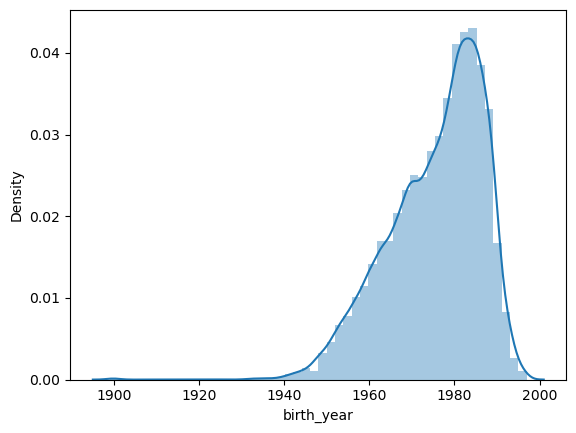

In [14]:
# Extreme value check

sns.distplot(df['birth_year'], bins = 50)

In [15]:
df_age_old = df.loc[df['birth_year'] < 1940]
df_age_old['birth_year'].value_counts(dropna = False)

birth_year
1935.0    13
1932.0    10
1939.0     8
1899.0     8
1900.0     7
1938.0     7
1937.0     6
1901.0     5
1922.0     3
1936.0     3
1933.0     3
1934.0     2
1917.0     1
1929.0     1
1926.0     1
1910.0     1
1924.0     1
1921.0     1
Name: count, dtype: int64

#### Observation:
I will create a new df excluding NaN's birth_year and birth_year under 1940

In [16]:
df_nan = df[df['birth_year'].isnull() == True]

In [17]:
df_nan['birth_year'].shape

(6482,)

In [18]:
# Creating a new dataframe excluding the missing values
# This time setting the isnull() condition to False instead of True (I want non-missing values as opposed to missing values) 

df_age_clean = df[df['birth_year'].isnull() == False]

In [19]:
df['birth_year'].shape

(46673,)

In [20]:
df_age_clean['birth_year'].shape

(40191,)

The calculation is correct!
 - 46673 - 40191 = 6482 (exactly the NaN values from birth_year)

In [21]:
# Now continue excluding the birth_year under 1940
df_age_old['birth_year'].value_counts(dropna = False)

birth_year
1935.0    13
1932.0    10
1939.0     8
1899.0     8
1900.0     7
1938.0     7
1937.0     6
1901.0     5
1922.0     3
1936.0     3
1933.0     3
1934.0     2
1917.0     1
1929.0     1
1926.0     1
1910.0     1
1924.0     1
1921.0     1
Name: count, dtype: int64

In [22]:
# Check the count
df_age_old['birth_year'].value_counts(dropna = False).sum()

81

In [23]:
df_age_clean['birth_year'].shape

(40191,)

In [24]:
df_clean = df_age_clean.loc[~df_age_clean['birth_year'].isin ([
1935.0,    
1932.0,    
1939.0,     
1899.0,     
1900.0,     
1938.0,     
1937.0,     
1901.0,     
1922.0,     
1936.0,     
1933.0,     
1934.0,     
1917.0,     
1929.0,     
1926.0,     
1910.0,     
1924.0,     
1921.0  ])]

In [25]:
df_clean.shape

(40110, 32)

The calculation is correct!
 - 40191 - 40110 = 81 (exactly the count of the birth_year under 1940)

In [26]:
df_clean['birth_year'].describe()

count    40110.000000
mean      1975.710297
std         10.840430
min       1940.000000
25%       1968.000000
50%       1978.000000
75%       1984.000000
max       1997.000000
Name: birth_year, dtype: float64

In [27]:
df_clean['birth_year'].dtype

dtype('float64')

In [28]:
df_clean['birth_year'] = df_clean['birth_year'].astype(int)

/var/folders/kj/ff_yw10j6_zbkk839hkzgftr0000gn/T/ipykernel_18333/4065121901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['birth_year'] = df_clean['birth_year'].astype(int)


In [29]:
df_clean['birth_year'].dtype

dtype('int64')

In [30]:
df_clean.isnull().sum()

bike_id                        0
weekday                        0
start_hour                     0
start_time                     0
start_station_id               0
start_station_name             0
start_station_latitude         0
start_station_longitude        0
end_time                       0
end_station_id                 0
end_station_name               0
end_station_latitude           0
end_station_longitude          0
trip_duration                  0
subscriber                     0
birth_year                     0
gender                         0
gender_category                0
trip_duration_min              0
start_year                     0
start_month                    0
start_week                     0
start_day                      0
end_year                       0
end_month                      0
end_week                       0
end_day                        0
end_hour                       0
days_category                  0
peak_hours                     0
avg_trip_d

In [31]:
df_clean.dtypes

bike_id                          int64
weekday                         object
start_hour                       int64
start_time                      object
start_station_id                 int64
start_station_name              object
start_station_latitude         float64
start_station_longitude        float64
end_time                        object
end_station_id                   int64
end_station_name                object
end_station_latitude           float64
end_station_longitude          float64
trip_duration                    int64
subscriber                      object
birth_year                       int64
gender                           int64
gender_category                 object
trip_duration_min                int64
start_year                       int64
start_month                      int64
start_week                       int64
start_day                        int64
end_year                         int64
end_month                        int64
end_week                 

Select variables that seem good for analysis
- start_hour
- birth_year
- avg_trip_duration_each_hour 

### Data Cleaning, Manipulations, and Reprocessing

In [32]:
# Drop non-numeric columns
df_numeric = df_clean.select_dtypes(include=[np.number])

In [33]:
# Verify non-numeric columns are dropped
print(df_numeric.info())

<class 'pandas.core.frame.DataFrame'>
Index: 40110 entries, 0 to 46672
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   bike_id                      40110 non-null  int64  
 1   start_hour                   40110 non-null  int64  
 2   start_station_id             40110 non-null  int64  
 3   start_station_latitude       40110 non-null  float64
 4   start_station_longitude      40110 non-null  float64
 5   end_station_id               40110 non-null  int64  
 6   end_station_latitude         40110 non-null  float64
 7   end_station_longitude        40110 non-null  float64
 8   trip_duration                40110 non-null  int64  
 9   birth_year                   40110 non-null  int64  
 10  gender                       40110 non-null  int64  
 11  trip_duration_min            40110 non-null  int64  
 12  start_year                   40110 non-null  int64  
 13  start_month          

In [34]:
# Select relevant variables for clustering
df = df_numeric[['start_hour', 'birth_year','trip_duration_min']]

In [35]:
print(df.head())

   start_hour  birth_year  trip_duration_min
0          18        1968                 16
1          18        1983                  9
2          19        1989                  6
3          11        1988                  9
5          22        1986                  7


In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
# Standardize the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [38]:
# Verify standardization
print(pd.DataFrame(scaled_df, columns=df.columns).head())

   start_hour  birth_year  trip_duration_min
0    0.792107   -0.711263           0.418817
1    0.792107    0.672464          -0.384544
2    0.994563    1.225954          -0.728842
3   -0.625085    1.133706          -0.384544
4    1.601931    0.949209          -0.614076


### The Elbow Technique

In [39]:
# Using the elbow technique with the negative inertia (score) method
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]
score = [kmeans[i].fit(scaled_df).score(scaled_df) for i in range(len(kmeans))]

score

/Users/nataliawijaya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nataliawijaya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nataliawijaya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nataliawijaya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

[-120329.99999999988,
 -90669.52285530366,
 -68058.08465837635,
 -50103.48339837187,
 -43827.600859502774,
 -39416.01826146607,
 -36259.13266890925,
 -33212.36550667822,
 -30715.140180237766]

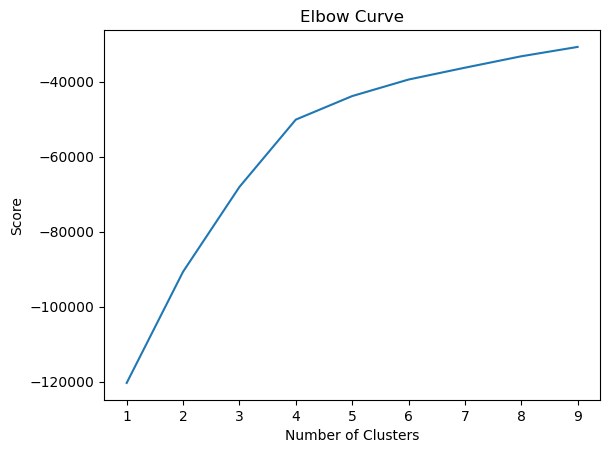

In [40]:
# Plot the elbow method graph with pylab
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

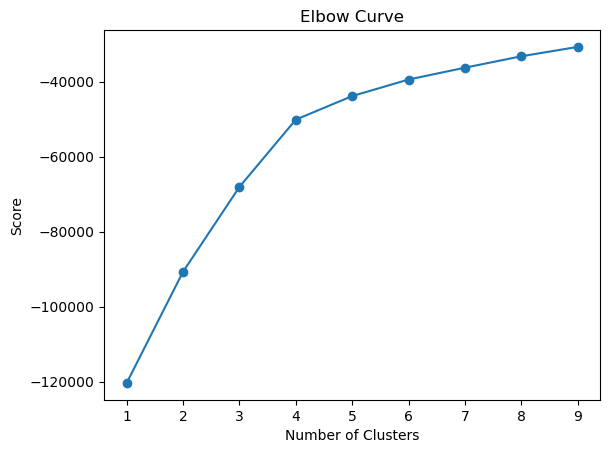

In [41]:
# Plot the elbow method graph with pylab
pl.plot(num_cl,score, marker='o')
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### Observation
Based on the elbow plot, the optimal number of clusters appears to be 4 as the curve starts to flatten out around 4 clusters.

### k-means clustering

In [42]:
# Apply the K-means algorithm to the standardized data with the chosen number of clusters, 4
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [43]:
# Fit the k-means object to the data.

kmeans.fit(scaled_df)

/Users/nataliawijaya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [44]:
# Add the cluster labels to the dataframe

df_numeric['clusters'] = kmeans.fit_predict(scaled_df)

/Users/nataliawijaya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [45]:
df_numeric.head()

,bike_id,start_hour,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,trip_duration,birth_year,...,start_week,start_day,end_year,end_month,end_week,end_day,end_hour,avg_trip_duration_each_hour,day_of_week,clusters
0,16013,18,523,40.754666,-73.991382,334,40.742388,-73.997262,993,1968,...,37,9,2013,9,37,9,18,14.1,2,1
1,15230,18,257,40.719392,-74.002472,236,40.728419,-73.987140,581,1983,...,37,12,2013,9,37,12,18,14.1,5,3
2,17942,19,479,40.760193,-73.991255,513,40.768254,-73.988639,361,1989,...,38,18,2013,9,38,18,19,13.2,4,3
3,19683,11,527,40.743156,-73.974347,441,40.756014,-73.967416,561,1988,...,39,28,2013,9,39,28,12,14.0,7,2
5,14581,22,293,40.730287,-73.990765,432,40.726218,-73.983799,427,1986,...,39,27,2013,9,39,27,22,12.7,6,3


In [46]:
df = df_numeric[['start_hour', 'birth_year','trip_duration_min', 'clusters']]

In [47]:
print(df.head())

   start_hour  birth_year  trip_duration_min  clusters
0          18        1968                 16         1
1          18        1983                  9         3
2          19        1989                  6         3
3          11        1988                  9         2
5          22        1986                  7         3


### Create Visualizations of the Clustered Data

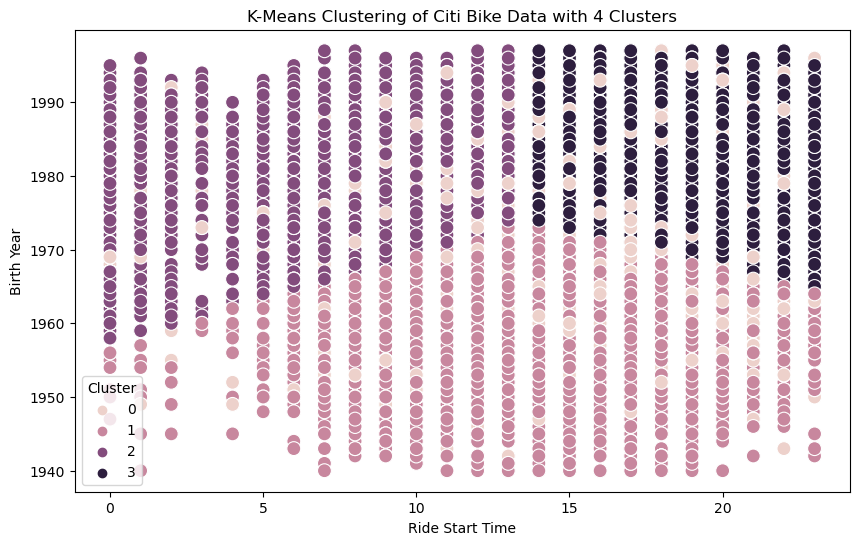

In [48]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data = df, x ='start_hour', y='birth_year', hue='clusters', s=100)
plt.title('K-Means Clustering of Citi Bike Data with 4 Clusters')
plt.xlabel('Ride Start Time')
plt.ylabel('Birth Year')
plt.legend(title='Cluster')
plt.show()

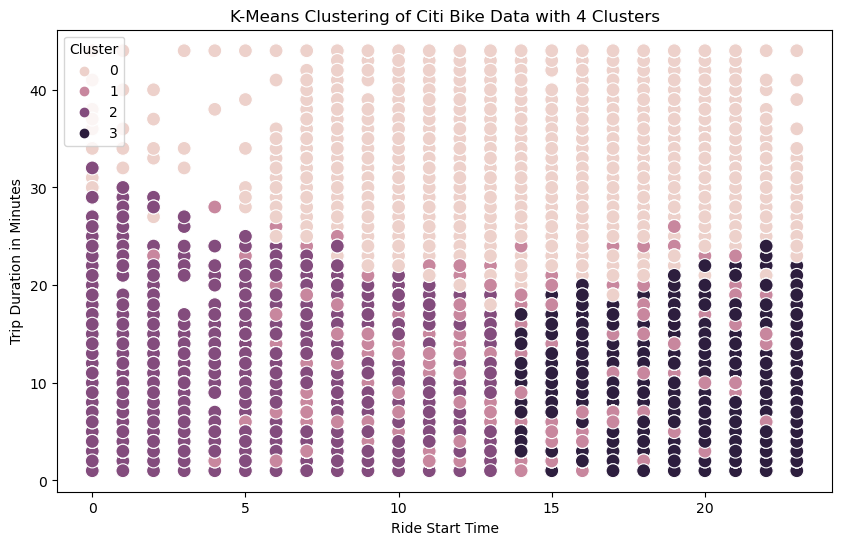

In [49]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data = df, x ='start_hour', y='trip_duration_min', hue='clusters', s=100)
plt.title('K-Means Clustering of Citi Bike Data with 4 Clusters')
plt.xlabel('Ride Start Time')
plt.ylabel('Trip Duration in Minutes')
plt.legend(title='Cluster')
plt.show()

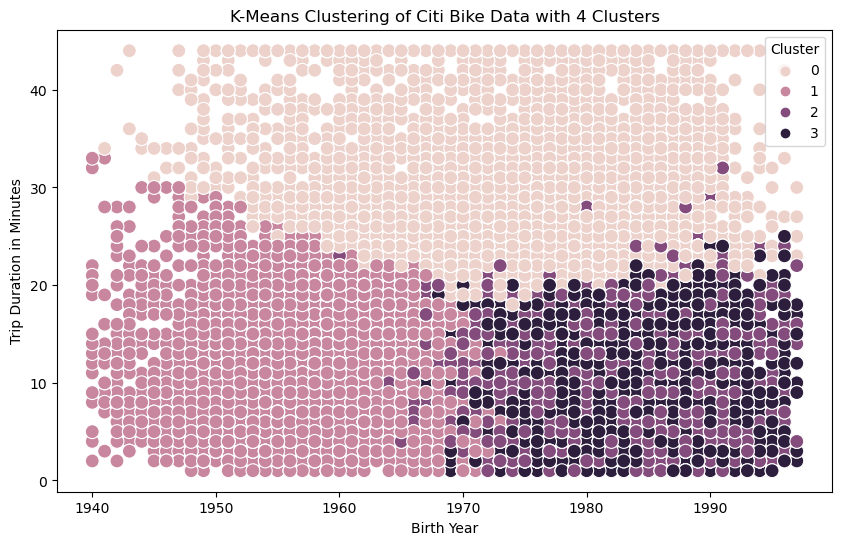

In [50]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data = df, x ='birth_year', y='trip_duration_min', hue='clusters', s=100)
plt.title('K-Means Clustering of Citi Bike Data with 4 Clusters')
plt.xlabel('Birth Year')
plt.ylabel('Trip Duration in Minutes')
plt.legend(title='Cluster')
plt.show()

In [51]:
df.loc[df['clusters'] == 3, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'light pink'

/var/folders/kj/ff_yw10j6_zbkk839hkzgftr0000gn/T/ipykernel_18333/648531869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['clusters'] == 3, 'cluster'] = 'dark purple'


In [52]:
df.groupby('cluster').agg({'start_hour':[ 'min', 'mean', 'median', 'max'], 
                         'birth_year':[ 'min', 'mean', 'median', 'max'], 
                          'trip_duration_min':[ 'min', 'mean', 'median', 'max']})

start_hour                       birth_year                       \
                   min       mean median max        min         mean  median   
cluster                                                                        
dark purple         14  18.066008   18.0  23       1965  1981.748259  1982.0   
light pink           0  15.068903   16.0  23       1941  1975.533189  1977.0   
pink                 0  13.790991   14.0  23       1940  1961.212482  1962.0   
purple               0   8.753867    9.0  13       1958  1980.602184  1981.0   

                  trip_duration_min                        
              max               min       mean median max  
cluster                                                    
dark purple  1997                 1   9.499005    9.0  25  
light pink   1997                18  29.316558   28.0  44  
pink         1973                 1  10.085982    9.0  33  
purple       1997                 1   9.402093    8.0  32

In [53]:
df.groupby('cluster').agg({'start_hour':['mean', 'median'], 
                         'birth_year':['mean', 'median'], 
                          'trip_duration_min':['mean', 'median']})

start_hour          birth_year         trip_duration_min       
                  mean median         mean  median              mean median
cluster                                                                    
dark purple  18.066008   18.0  1981.748259  1982.0          9.499005    9.0
light pink   15.068903   16.0  1975.533189  1977.0         29.316558   28.0
pink         13.790991   14.0  1961.212482  1962.0         10.085982    9.0
purple        8.753867    9.0  1980.602184  1981.0          9.402093    8.0

Cluster Analysis:
1. Dark purple (3) and pink (1) clusters:
- Dominated by younger users compared to other clusters
- The average trip duration is also shorter than other clusters, thus supporting previous findings that the younger the age, the faster the trip duration
2. Purple cluster (2):
- This cluster is inhabited by elderly people compared to other clusters
- Users themselves tend to ride during normal hours and will have fewer users in the early morning and late night. This is inversely proportional to clusters 3 and 1 above which tend to have more users in the early morning and late night
3. Light pink cluster (0):
- This cluster seems to be a unique cluster whose users are evenly distributed based on age. This also has similarities with the previous cluster (2) where users tend to cycle during normal hours
- This cluster has the longest average trip duration